# Importation des BD

In [205]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.offline as pyo
import numpy as np
import scipy
from statsmodels.stats import weightstats
import seaborn as sns
from copy import copy

In [206]:
gender = pd.read_csv("D:/Simplon/Brief projet/Titanic/gender_submission.csv")
test = pd.read_csv("D:/Simplon/Brief projet/Titanic/test.csv")
train = pd.read_csv("D:/Simplon/Brief projet/Titanic/train.csv")

# Analyse des données

In [188]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
trainn = train.drop_duplicates()
doublons = train.shape[0] - trainn.shape[0]
doublons_pct = doublons/train.shape[0]*100
print("Il y a", doublons, ", soit", round(doublons_pct, 4), "% de doublons dans la table Train.")

Il y a 0 , soit 0.0 % de doublons dans la table Train.


In [190]:
print(train.isnull().sum()/train.shape[0]*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [191]:
train["Age"].fillna(train["Age"].mean(), inplace = True)
del train["Cabin"]
train.dropna(inplace= True)

In [192]:
print(train.isnull().sum()/train.shape[0]*100)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


# DATAVIZ

In [193]:
train.Survived.groupby(train.Sex).value_counts()

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [194]:
labels1 = train.Sex[train.Survived == 0].groupby(train.Sex).count().index
labels2 = train.Sex[train.Survived == 1].groupby(train.Sex).count().index
values1 = train.Sex[train.Survived == 0].groupby(train.Sex).count().values
values2 = train.Sex[train.Survived == 1].groupby(train.Sex).count().values

fig1 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction du sexe"
# Change the bar mode
fig1.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig1.show()

In [195]:
train.Survived.groupby(train.Pclass).value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [61]:
labels1 = train.Pclass[train.Survived == 0].groupby(train.Pclass).count().index
labels2 = train.Pclass[train.Survived == 1].groupby(train.Pclass).count().index
values1 = train.Pclass[train.Survived == 0].groupby(train.Pclass).count().values
values2 = train.Pclass[train.Survived == 1].groupby(train.Pclass).count().values


fig2 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction de la classe de ticket"
# Change the bar mode
fig2.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig2.show()

In [62]:
train.Survived.groupby(train.Embarked).value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [63]:
def legend_embarked(liste) :
    L = liste.to_list()
    for k in range(len(L)) :
        if L[k] == "C" :
            L[k] = "Cherbourg"
        elif L[k] == "Q" :
            L[k] = "Queenstown"
        elif L[k] == "S" :
            L[k] = "Southampton"
    return L

In [64]:
labels1 = train.Embarked[train.Survived == 0].groupby(train.Embarked).count().index
labels2 = train.Embarked[train.Survived == 1].groupby(train.Embarked).count().index
values1 = train.Embarked[train.Survived == 0].groupby(train.Embarked).count().values
values2 = train.Embarked[train.Survived == 1].groupby(train.Embarked).count().values

fig3 = go.Figure(data=[
    go.Bar(name='Morts', x=legend_embarked(labels1), y=values1),
    go.Bar(name='En vie', x=legend_embarked(labels2), y=values2)
])

title = "Etat des passager en fonction du point d'embarquement"
# Change the bar mode
fig3.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig3.show()

In [65]:
def process_age(df, cut_points, labels) :
    df["Age_categorie"] = pd.cut(df["Age"], cut_points, labels = labels)
    return df

cut_points = [0, 5, 18, 30, 60, 100]
labels = ["Baby", "Child", "Junior", "Adult", "Senior"]

train = process_age(train, cut_points, labels)

In [66]:
train.Survived.groupby(train.Age_categorie).value_counts()

Age_categorie  Survived
Baby           1            31
               0            13
Child          0            56
               1            39
Junior         0           299
               1           148
Adult          0           164
               1           118
Senior         0            17
               1             4
Name: Survived, dtype: int64

In [67]:
train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count()

Age_categorie
Baby       13
Child      56
Junior    299
Adult     164
Senior     17
Name: Age, dtype: int64

In [68]:
labels1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().index
labels2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().index
values1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().values
values2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().values


fig4 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction de leur âge"
# Change the bar mode
fig4.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig4.show()

In [69]:
train.Age.groupby(train.Age_categorie).count()

Age_categorie
Baby       44
Child      95
Junior    447
Adult     282
Senior     21
Name: Age, dtype: int64

In [70]:
labels1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().index
labels2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().index
values1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().values
values2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().values


fig5 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction de leur âge"
# Change the bar mode
fig5.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig5.show()

In [71]:
train.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [72]:
def process_fare(df, cut_points, labels) :
    df["Fare_categorie"] = pd.cut(df["Fare"], cut_points, labels = labels)
    return df

cut_points = [0, 8, 15, 30, 1000]
labels = ["Cheap", "Low", "High", "Expensive"]

train = process_fare(train, cut_points, labels)

In [73]:
train.Survived.groupby(train.Fare_categorie).value_counts()

Fare_categorie  Survived
Cheap           0           175
                1            51
Low             0           155
                1            62
High            0           107
                1            92
Expensive       1           134
                0            98
Name: Survived, dtype: int64

In [74]:
labels1 = train.Fare[train.Survived == 0].groupby(train.Fare_categorie[train.Survived == 0]).count().index
labels2 = train.Fare[train.Survived == 1].groupby(train.Fare_categorie[train.Survived == 1]).count().index
values1 = train.Fare[train.Survived == 0].groupby(train.Fare_categorie[train.Survived == 0]).count().values
values2 = train.Fare[train.Survived == 1].groupby(train.Fare_categorie[train.Survived == 1]).count().values


fig6 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction du prix du ticket"
# Change the bar mode
fig6.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig6.show()

In [75]:
a = train.Fare.groupby(train.Embarked).mean()
a

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [76]:
title = "Moyenne des tarifs par lieu d'embarquement"

fig7 = px.bar(a, x = legend_embarked(a.index), y = a.values, title = {'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig7.show()

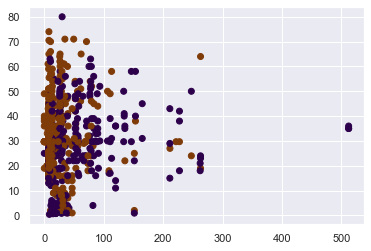

In [77]:
fig8 = plt.scatter(train['Fare'], train['Age'], c=train['Survived'], cmap="PuOr")
fig8

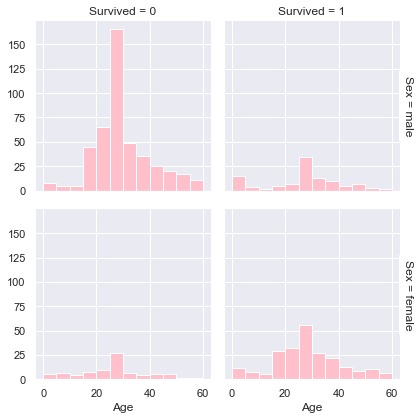

In [78]:
sns.set(style="darkgrid")
g = sns.FacetGrid(train, row="Sex", col="Survived", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "Age", color="pink", bins=bins)

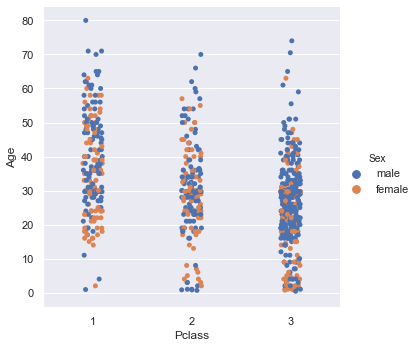

In [79]:
sns.catplot(x="Pclass", y="Age", data=train, hue = "Sex")

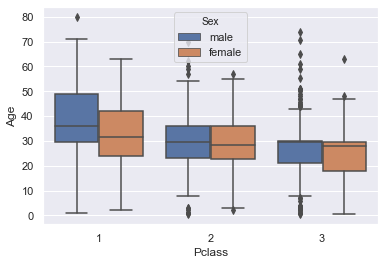

In [80]:
sns.boxplot(x="Pclass", y="Age", data=train, hue = "Sex")

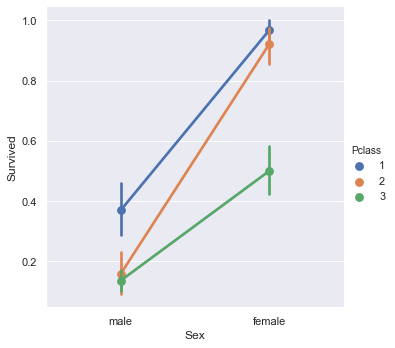

In [81]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=train)

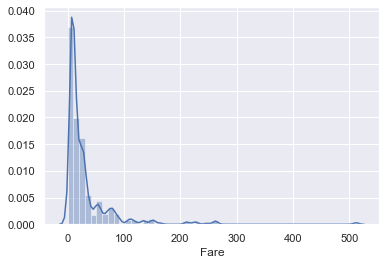

In [82]:
sns.distplot(train['Fare'])

# Tests statistiques

In [219]:
train = pd.read_csv("D:/Simplon/Brief projet/Titanic/train.csv")
train["Age"].fillna(train["Age"].mean(), inplace = True)
del train["Cabin"]
train.dropna(inplace= True)

In [221]:
cut_points = [0, 5, 18, 30, 60, 100]
labels = ["Baby", "Child", "Junior", "Adult", "Senior"]

train = process_age(train, cut_points, labels)

cut_points = [0, 8, 15, 30, 1000]
labels = ["Cheap", "Low", "High", "Expensive"]

train = process_fare(train, cut_points, labels)

In [222]:
train_stats = train

In [223]:
del train_stats['Name']
del train_stats['Ticket']

In [94]:
del train_stats['Name']
del train_stats['Ticket']
del train_stats['Age_categorie']
del train_stats['Fare_categorie']

In [224]:
train_stats = pd.get_dummies(train_stats)

In [217]:
train_stats.head(15)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_categorie_Cheap,Age_categorie_Low,Age_categorie_High,Age_categorie_Expensive,Fare_categorie_Cheap,Fare_categorie_Low,Fare_categorie_High,Fare_categorie_Expensive
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1,0,1,0,0,0
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,0,0,1
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1,0,1,0,0,0
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1,0,0,0,1,0,1,0,0
5,6,0,3,29.699118,0,0,8.4583,0,1,0,1,0,0,0,1,0,0,1,0,0
6,7,0,1,54.000000,0,0,51.8625,0,1,0,0,1,0,0,0,1,0,0,0,1
7,8,0,3,2.000000,3,1,21.0750,0,1,0,0,1,1,0,0,0,0,0,1,0
8,9,1,3,27.000000,0,2,11.1333,1,0,0,0,1,0,0,1,0,0,1,0,0
9,10,1,2,14.000000,1,0,30.0708,1,0,1,0,0,0,1,0,0,0,0,0,1


In [140]:
train_stats.shape

(889, 12)

In [141]:
train_stats.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [142]:
train_stats.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604,-0.089434,0.089434,0.033853,-0.012823,-0.021589
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
Sex_female,-0.043136,0.541585,-0.127741,-0.089434,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,0.043136,-0.541585,0.127741,0.089434,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,-0.001208,0.169966,-0.245733,0.033853,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613


In [143]:
train_stats.corr(method='spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.004997,-0.034260,0.040681,-0.061310,0.001197,-0.014072,-0.043118,0.043118,-0.001209,-0.033629,0.022229
Survived,-0.004997,1.000000,-0.336917,-0.043135,0.090944,0.140126,0.320772,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.034260,-0.336917,1.000000,-0.305614,-0.045279,-0.024696,-0.686166,-0.131944,0.131944,-0.222955,0.229391,0.050948
Age,0.040681,-0.043135,-0.305614,1.000000,-0.145570,-0.216402,0.114772,-0.072262,0.072262,0.025885,0.003763,-0.025050
SibSp,-0.061310,0.090944,-0.045279,-0.145570,1.000000,0.449607,0.450749,0.197740,-0.197740,0.013423,-0.049016,0.019095
Parch,0.001197,0.140126,-0.024696,-0.216402,0.449607,1.000000,0.413106,0.256835,-0.256835,0.022505,-0.099681,0.043031
Fare,-0.014072,0.320772,-0.686166,0.114772,0.450749,0.413106,1.000000,0.256188,-0.256188,0.205877,-0.231820,-0.034455
Sex_female,-0.043118,0.541585,-0.131944,-0.072262,0.197740,0.256835,0.256188,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,0.043118,-0.541585,0.131944,0.072262,-0.197740,-0.256835,-0.256188,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,-0.001209,0.169966,-0.222955,0.025885,0.013423,0.022505,0.205877,0.084520,-0.084520,1.000000,-0.148646,-0.782613


In [225]:
train_stats.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_categorie_Baby,Age_categorie_Child,Age_categorie_Junior,Age_categorie_Adult,Age_categorie_Senior,Fare_categorie_Cheap,Fare_categorie_Low,Fare_categorie_High,Fare_categorie_Expensive
PassengerId,1.0,-0.005,-0.035,0.03,-0.058,-0.0017,0.013,-0.043,0.043,-0.0012,-0.034,0.022,-0.031,0.021,-0.057,0.069,-0.02,0.029,-0.012,-0.033,0.0046
Survived,-0.005,1.0,-0.34,-0.075,-0.034,0.083,0.26,0.54,-0.54,0.17,0.0045,-0.15,0.15,0.02,-0.11,0.05,-0.061,-0.19,-0.11,0.088,0.24
Pclass,-0.035,-0.34,1.0,-0.33,0.082,0.017,-0.55,-0.13,0.13,-0.25,0.22,0.076,0.07,0.1,0.21,-0.29,-0.13,0.48,0.19,-0.032,-0.61
Age,0.03,-0.075,-0.33,1.0,-0.23,-0.18,0.089,-0.089,0.089,0.034,-0.013,-0.022,-0.48,-0.4,-0.24,0.6,0.44,-0.049,-0.025,-0.033,0.096
SibSp,-0.058,-0.034,0.082,-0.23,1.0,0.41,0.16,0.12,-0.12,-0.06,-0.027,0.069,0.24,0.17,-0.1,-0.098,-0.054,-0.23,-0.21,0.14,0.31
Parch,-0.0017,0.083,0.017,-0.18,0.41,1.0,0.22,0.25,-0.25,-0.012,-0.082,0.062,0.28,0.15,-0.22,0.0094,-0.019,-0.25,-0.19,0.18,0.28
Fare,0.013,0.26,-0.55,0.089,0.16,0.22,1.0,0.18,-0.18,0.27,-0.12,-0.16,-0.0026,0.006,-0.14,0.14,0.023,-0.29,-0.24,-0.098,0.64
Sex_female,-0.043,0.54,-0.13,-0.089,0.12,0.25,0.18,1.0,-1.0,0.085,0.075,-0.12,0.06,0.1,-0.065,0.00015,-0.083,-0.17,-0.056,0.097,0.16
Sex_male,0.043,-0.54,0.13,0.089,-0.12,-0.25,-0.18,-1.0,1.0,-0.085,-0.075,0.12,-0.06,-0.1,0.065,-0.00015,0.083,0.17,0.056,-0.097,-0.16
Embarked_C,-0.0012,0.17,-0.25,0.034,-0.06,-0.012,0.27,0.085,-0.085,1.0,-0.15,-0.78,-0.0042,0.019,-0.0027,-0.0018,-0.018,-0.057,-0.13,-0.039,0.24


In [179]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Sex_female, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print(khi2, p, dof)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

258.42661044637634 3.7799096665574906e-58 1
Les deux variables ne sont pas indépendantes.


In [180]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Age < 18, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print(khi2, p, dof)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

12.821746858047035 0.00034261369274988666 1
Les deux variables ne sont pas indépendantes.


In [181]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Fare, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print(khi2, p, dof)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

423.17028866639606 1.553812876621213e-11 246
Les deux variables ne sont pas indépendantes.


In [182]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Pclass, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print(khi2, p, dof)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

100.98040726128336 1.1813624785477922e-22 2
Les deux variables ne sont pas indépendantes.


# Régression linéraire

# DASH

# Correlation

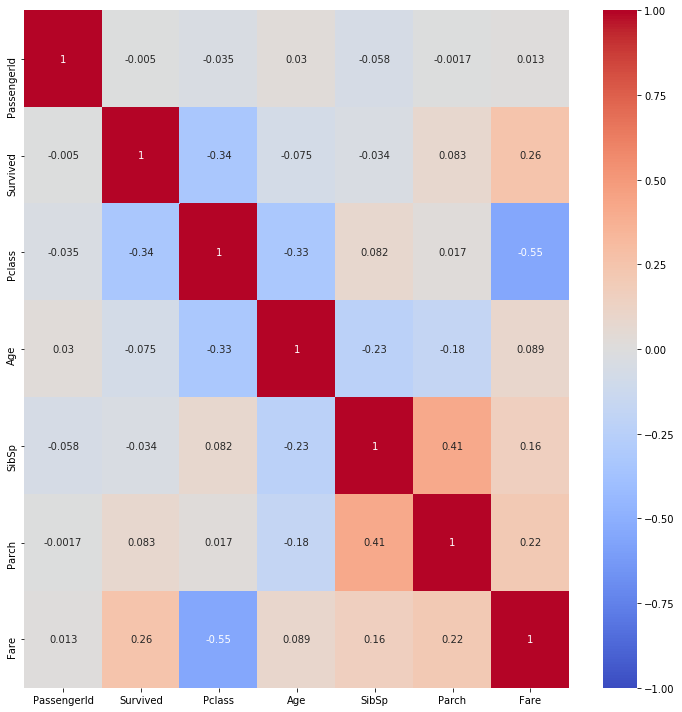

In [103]:
fig, ax = plt.subplots(figsize=(10,10))  
corr = train.corr()
ax =sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.tight_layout()
plt.show()

# 